In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/ARIMA_Models_in_Python/datasets/'
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")


In [3]:
milk_production = pd.read_csv(path_data+'milk_production.csv', index_col='date', parse_dates=True)
milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


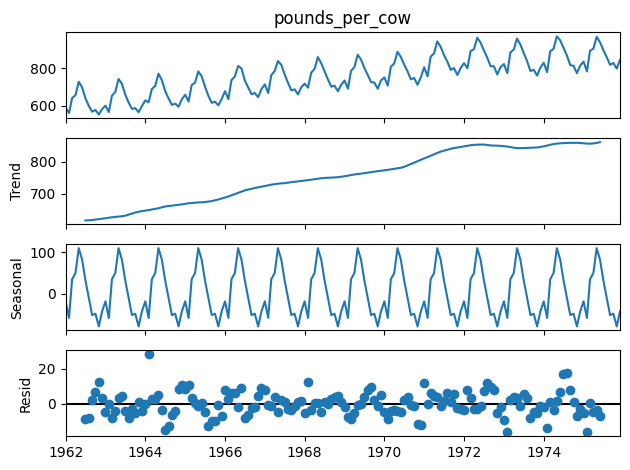

'\nUdderly amazing work! You have extracted the seasonal cycle and now you can see the trend much more clearly.\n'

In [5]:
# exercise 01

"""
Seasonal decompose

You can think of a time series as being composed of trend, seasonal and residual components. This can be a good way to think about the data when you go about modeling it. If you know the period of the time series you can decompose it into these components.

In this exercise you will decompose a time series showing the monthly milk production per cow in the USA. This will give you a clearer picture of the trend and the seasonal cycle. Since the data is monthly you will guess that the seasonality might be 12 time periods, however this won't always be the case.

The milk production time series has been loaded in to the DataFrame milk_production and is available in your environment.
"""

# Instructions

"""

    Import the seasonal_decompose() function from statsmodels.tsa.seasonal.
    Decompose the 'pounds_per_cow' column of milk_production using an additive model and period of 12 months.
    Plot the decomposition.

"""

# solution

# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], 
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

#----------------------------------#

# Conclusion

"""
Udderly amazing work! You have extracted the seasonal cycle and now you can see the trend much more clearly.
"""

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

water = pd.read_csv(path_data+'water.csv', index_col='date', parse_dates=True)
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


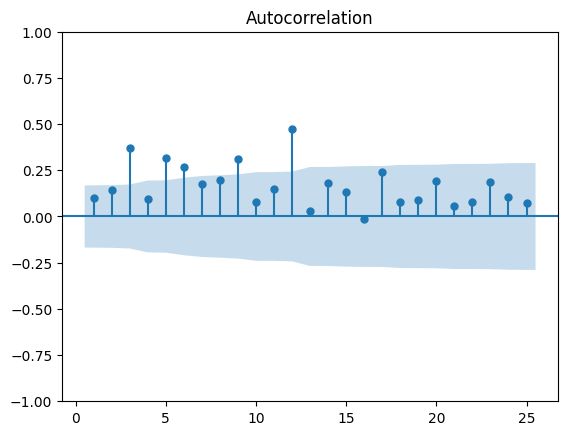

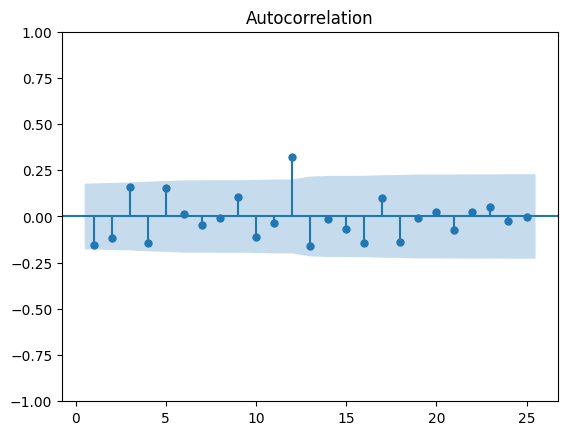

"\nGreat! Although you couldn't see it by looking at the time series itself, the ACF shows that there is an seasonal component and so including it will make your predictions better.\n"

In [9]:
# exercise 02

"""
Seasonal ACF and PACF

Below is a time series showing the estimated number of water consumers in London. By eye you can't see any obvious seasonal pattern, however your eyes aren't the best tools you have.

In this exercise you will use the ACF and PACF to test this data for seasonality. You can see from the plot above that the time series isn't stationary, so you should probably detrend it. You will detrend it by subtracting the moving average. Remember that you could use a window size of any value bigger than the likely period.

The plot_acf() function has been imported and the time series has been loaded in as water.
"""

# Instructions

"""

    Plot the ACF of the 'water_consumers' column of the time series up to 25 lags.
---
    Subtract a 15 step rolling mean from the original time series and assign this to water_2
    Drop the NaN values from water_2
---
Question

    What is the time period of the seasonal component of this data?
(12 timesteps)
"""

# solution

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

#----------------------------------#

# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

#----------------------------------#

# Conclusion

"""
Great! Although you couldn't see it by looking at the time series itself, the ACF shows that there is an seasonal component and so including it will make your predictions better.
"""

In [12]:
df1 = pd.read_csv(path_data+'ch4_df1.csv', index_col='Unnamed: 0', parse_dates=True)
df2 = pd.read_csv(path_data+'ch4_df2.csv', index_col='Unnamed: 0', parse_dates=True)
df3 = pd.read_csv(path_data+'ch4_df3.csv', index_col='Unnamed: 0', parse_dates=True)
display(df1.head(), df2.head(),df3.head())

,Y
2013-01-01,-259.864025
2013-01-02,649.658343
2013-01-03,115.910012
2013-01-04,-427.655465
2013-01-05,416.645144


,Y
2013-01-01,-1664.274145
2013-01-02,-1797.404781
2013-01-03,-2108.942905
2013-01-04,-2611.186919
2013-01-05,-3025.791912


,Y
2013-01-01,2141.496089
2013-01-02,1558.108930
2013-01-03,2686.448093
2013-01-04,1271.345214
2013-01-05,720.820022


In [13]:
# exercise 03

"""
Fitting SARIMA models

Fitting SARIMA models is the beginning of the end of this journey into time series modeling.

It is important that you get to know your way around the SARIMA model orders and so that's what you will focus on here.

In this exercise, you will practice fitting different SARIMA models to a set of time series.

The time series DataFrames df1, df2 and df3 are available in your environment.
"""

# Instructions

"""

    Import the SARIMAX model class from statsmodels.tsa.statespace.sarimax.
    ---
    Create a SARIMAX(1,0,0)(1,1,0)

    model and fit it to df1.
    Print the model summary table.
    ---
    Create a SARIMA(2,1,1)(1,0,0)

    model and fit it to df2.
    ---
    Create a SARIMA(1,1,0)(0,1,1)

model and fit it to df3.
"""

# solution

# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMA model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

#----------------------------------#

# Create a SARIMA model
model = SARIMAX(df2, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

#----------------------------------#

# Create a SARIMA model
model = SARIMAX(df3, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

#----------------------------------#

# Conclusion

"""
Great! You have now got to grips with the seasonal and non-seasonal model orders. Did you notice how the parameters for the seasonal and non-seasonal AR and MA coefficients are printed in the results table?
"""

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18244D+00    |proj g|=  2.59653D-02

At iterate    5    f=  6.18168D+00    |proj g|=  1.17852D-03

At iterate   10    f=  6.18142D+00    |proj g|=  1.88209D-02

At iterate   15    f=  6.17979D+00    |proj g|=  1.95179D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   7.271D-06   6.180D+00
  F =   6.1797829388924610     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

 This problem is unconstrained.



At iterate   10    f=  7.00445D+00    |proj g|=  9.64646D-05

At iterate   15    f=  7.00445D+00    |proj g|=  1.00511D-03

At iterate   20    f=  7.00430D+00    |proj g|=  6.54502D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   2.737D-06   7.004D+00
  F =   7.0042448381879936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log

 This problem is unconstrained.



At iterate    5    f=  5.21375D+00    |proj g|=  3.92475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   3.925D-05   5.214D+00
  F =   5.2137493459731994     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                      SARIMAX Results                                       
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.375
Date:                              Thu, 31 Aug 2023   AIC                         

'\nGreat! You have now got to grips with the seasonal and non-seasonal model orders. Did you notice how the parameters for the seasonal and non-seasonal AR and MA coefficients are printed in the results table?\n'

In [14]:
aus_employment = pd.read_csv(path_data+'aus_employment.csv', index_col='date',parse_dates=True)
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


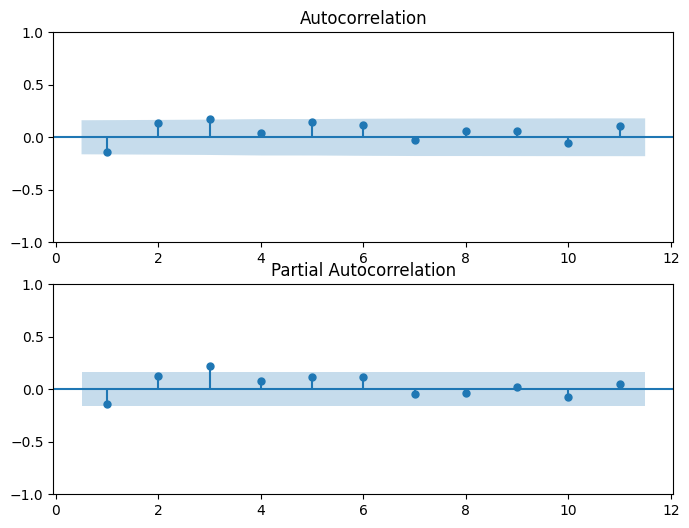

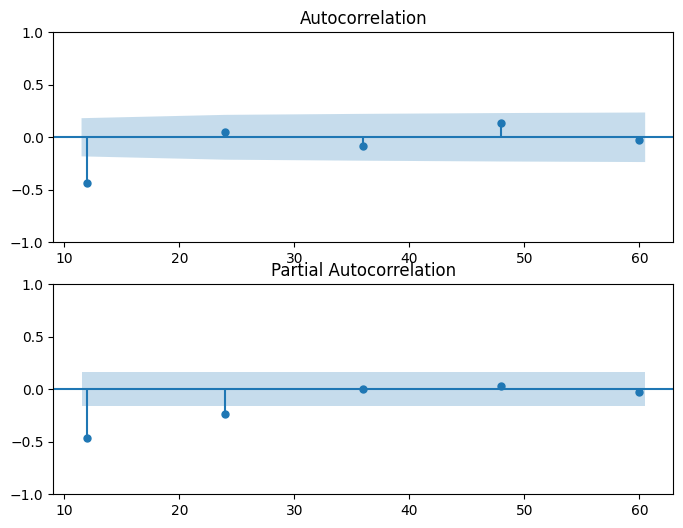

"\nGreat! The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these. The Seasonal ACF and PACF look like an MA(1) model. We select the model that combines both of these.\n"

In [16]:
# exercise 04

"""
Choosing SARIMA order

In this exercise you will find the appropriate model order for a new set of time series. This is monthly series of the number of employed persons in Australia (in thousands). The seasonal period of this time series is 12 months.

You will create non-seasonal and seasonal ACF and PACF plots and use the table below to choose the appropriate model orders.
	AR(p) 	MA(q) 	ARMA(p,q)
ACF 	Tails off 	Cuts off after lag q 	Tails off
PACF 	Cuts off after lag p 	Tails off 	Tails off

The DataFrame aus_employment and the functions plot_acf() and plot_pacf() are available in your environment.

Note that you can take multiple differences of a DataFrame using df.diff(n1).diff(n2).
"""

# Instructions

"""

    Take the first order difference and the seasonal difference of the aus_employment and drop the NaN values. The seasonal period is 12 months.
---

    Plot the ACF and PACF of aus_employment_diff up to 11 lags.
---

    Make a list of the first 5 seasonal lags and assign the result to lags.
    Plot the ACF and PACF of aus_employment_diff for the first 5 seasonal lags.
---
Question

    Based on the ACF and PACF plots, which of these models is most likely for the data?
(SARIMAX(0,1,0)(0,1,1)12)
"""

# solution

# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

#----------------------------------#

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2)

plt.show()

#----------------------------------#

# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2)

plt.show()

#----------------------------------#

# Conclusion

"""
Great! The non-seasonal ACF doesn't show any of the usual patterns of MA, AR or ARMA models so we choose none of these. The Seasonal ACF and PACF look like an MA(1) model. We select the model that combines both of these.
"""

In [25]:
aus_test.shape

(32, 1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45005D+00    |proj g|=  5.61570D-02


 This problem is unconstrained.



At iterate    5    f=  4.43314D+00    |proj g|=  7.52968D-03

At iterate   10    f=  4.40964D+00    |proj g|=  5.19049D-02

At iterate   15    f=  4.40229D+00    |proj g|=  7.41839D-02

At iterate   20    f=  4.39992D+00    |proj g|=  9.16610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   5.713D-07   4.400D+00
  F =   4.3999174382518307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


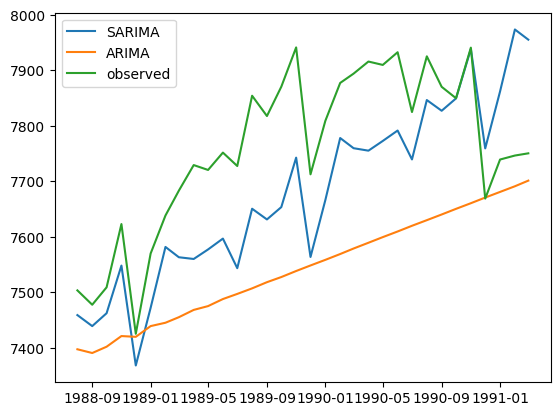

'\nFantastic job! You can see that the SARIMA model has forecast the upward trend and the seasonal cycle, whilst the ARIMA model has only forecast the upward trend with an added wiggle. This makes the SARIMA forecast much closer to the truth for this seasonal data!\n'

In [26]:
# exercise 05

"""
SARIMA vs ARIMA forecasts

In this exercise, you will see the effect of using a SARIMA model instead of an ARIMA model on your forecasts of seasonal time series.

Two models, an ARIMA(3,1,2) and a SARIMA(0,1,1)(1,1,1)

, have been fit to the Wisconsin employment time series. These were the best ARIMA model and the best SARIMA model available according to the AIC.

In the exercise you will use these two models to make dynamic future forecast for 25 months and plot these predictions alongside held out data for this period, wisconsin_test.

The fitted ARIMA results object and the fitted results object are available in your environment as arima_results and sarima_results.
"""

# Instructions

"""

    Create a forecast object, called arima_pred, for the ARIMA model to forecast the next 25 steps after the end of the training data.
    Extract the forecast .predicted_mean attribute from arima_pred and assign it to arima_mean.
    Repeat the above two steps for the SARIMA model.
    Plot the SARIMA and ARIMA forecasts and the held out data wisconsin_test.

"""

""" Modified to use aus_employment due to not having wisconsin data """

aus_train = aus_employment.iloc[:int(len(aus_employment)*0.8)]
aus_test = aus_employment.iloc[int(len(aus_employment)*0.8):]

dates = aus_test.index

arima_mdl = ARIMA(aus_train, order=(3,1,2))
arima_results = arima_mdl.fit()

sarima_mdl = SARIMAX(aus_train, order=(0,1,1), seasonal_order=(1,1,1,12))
sarima_results = sarima_mdl.fit()


# solution

# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=aus_test.shape[0])
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=aus_test.shape[0])
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(aus_test, label='observed')
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Fantastic job! You can see that the SARIMA model has forecast the upward trend and the seasonal cycle, whilst the ARIMA model has only forecast the upward trend with an added wiggle. This makes the SARIMA forecast much closer to the truth for this seasonal data!
"""

In [27]:
# exercise 06

"""
Automated model selection

The pmdarima package is a powerful tool to help you choose the model orders. You can use the information you already have from the identification step to narrow down the model orders which you choose by automation.

Remember, although automation is powerful, it can sometimes make mistakes that you wouldn't. It is hard to guess how the input data could be imperfect and affect the test scores.

In this exercise you will use the pmdarima package to automatically choose model orders for some time series datasets.

Be careful when setting the model parameters, if you set them incorrectly your session may time out.

Three datasets are available in your environment as df1, df2 and df3.
"""

# Instructions

"""

    Import the pmdarima package as pm.
---
    Model the time series df1 with period 7 days and set first order seasonal differencing and no non-seasonal differencing.
---
    Create a model to fit df2. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.
---
    Fit a SARIMAX(p,1,q)(P,1,Q)

model to the data setting start_p, start_q, max_p, max_q, max_P and max_Q to 1.
"""

# solution

# Import pmdarima as pm
import pmdarima as pm

#----------------------------------#

# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1, 
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

#----------------------------------#

# Create model
model2 = pm.auto_arima(df2,
                      d=1,
                      seasonal=False,
                      trend='c',
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model2.summary())

#----------------------------------#

# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

#----------------------------------#

# Conclusion

"""
Well done! We use the information we already know about the time series to predefine some of the orders before we fit. Automating the choice of orders can speed us up, but it needs to be done with care.
"""

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=1126.243, Time=1.50 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1124.181, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1120.307, Time=0.66 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1122.059, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1122.348, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1124.789, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1119.762, Time=0.83 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=1121.631, Time=2.56 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1120.824, Time=2.18 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1118.936, Time=0.97 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1119.180, Time=0.60 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1120.670, Time=2.35 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1119.933, Time=1.29 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1119.777, Time=2.30 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept

'\nWell done! We use the information we already know about the time series to predefine some of the orders before we fit. Automating the choice of orders can speed us up, but it needs to be done with care.\n'

In [6]:
# exercise 07

"""
Saving and updating models

Once you have gone through the steps of the Box-Jenkins method and arrived at a model you are happy with, you will want to be able to save that model and also to incorporate new measurements when they are available. This is key part of putting the model into production.

In this exercise you will save a freshly trained model to disk, then reload it to update it with new data.

The model is available in your environment as model.
"""

# Instructions

"""

    Import the joblib package and use it to save the model to "candy_model.pkl".
---

    Use the joblib package to load the model back in as loaded_model.
---

    Update the loaded model with the data df_new.

"""

# solution

# Import joblib
import joblib

# Set model name
filename = 'candy_model.pkl'

# Pickle it
joblib.dump(model,filename)

#----------------------------------#

# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

#----------------------------------#

# Update the model
loaded_model.update(df_new)

#----------------------------------#

# Conclusion

"""
Nice! You've just updated an old model with new measurements. This means it will make better prediction of the future. The next step might be to make new predictions with this model or save the updated version back to the file.
"""

'\n\n'

In [30]:
co2 = pd.read_csv(path_data+'co2.csv', index_col='date', parse_dates=True)
co2.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28710D-01    |proj g|=  9.40591D-01


 This problem is unconstrained.



At iterate    5    f=  2.63132D-01    |proj g|=  1.54043D-01

At iterate   10    f=  2.52059D-01    |proj g|=  3.34392D-03

At iterate   15    f=  2.51917D-01    |proj g|=  2.39756D-02

At iterate   20    f=  2.51875D-01    |proj g|=  2.35614D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     28      1     0     0   2.356D-06   2.519D-01
  F =  0.25187488527239749     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


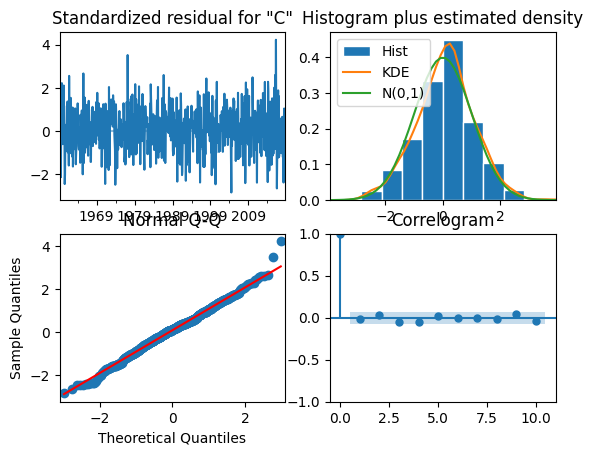

'\nPerfect, the residuals look fine in these plots.\n'

In [31]:
# exercise 08

"""
SARIMA model diagnostics

Usually the next step would be to find the order of differencing and other model orders. However, this time it's already been done for you. The time series is best fit by a SARIMA(1, 1, 1)(0, 1, 1)

model with an added constant.

In this exercise you will make sure that this is a good model by first fitting it using the SARIMAX class and going through the normal model diagnostics procedure.

The co2 DataFrame, and the SARIMAX model class are available in your environment.
"""

# Instructions

"""
Fit a SARIMA(1, 1, 1)(0, 1, 1)12 model to the data.
---
Question

    In the console, print the summary of the results object you just created. Is there anything wrong with this model?
(No)
---

    Create the common diagnostics plots for the results object.
---
Question

    Examine the plot you just created. Is there anything wrong with this model?
(No)
"""

# solution

# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
)
# Fit model
results = model.fit()

#----------------------------------#

# Plot common diagnostics
results.plot_diagnostics()
plt.show()

#----------------------------------#


# Conclusion

"""
Perfect, the residuals look fine in these plots.
"""

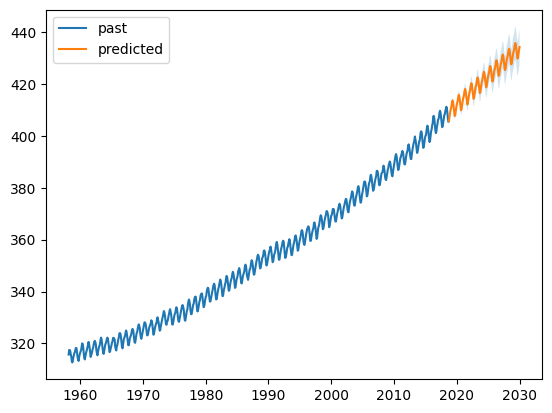

434.26053900966946
lower CO2_ppm    427.484718
upper CO2_ppm    441.036360
Name: 2030-01-01 00:00:00, dtype: float64


'\nGreat work! Your estimate says that CO2 will increase by roughly another 35ppm from October 2018 to January 2030. What do you think would happen if we lowered or raised our emission rates between now an then? How would our model perform if these dynamics changed?\n'

In [32]:
# exercise 09

"""
SARIMA forecast

In the previous exercise you confirmed that a SARIMA
x model was a good fit to the CO

time series by using diagnostic checking.

Now its time to put this model into practice to make future forecasts. Climate scientists tell us that we have until 2030 to drastically reduce our CO

emissions or we will face major societal challenges.

In this exercise, you will forecast the CO
time series up to the year 2030 to find the CO

levels if we continue emitting as usual.

The trained model results object is available in your environment as results.
"""

# Instructions

"""
Create a forecast object for the next 136 steps - the number of months until Jan 2030.
Assign the .predicted_mean of the forecast to the variable mean.
Compute the confidence intervals and assign this DataFrame to the variable conf_int
---

    Plot the mean predictions against the dates.
    Shade the area between the values in the first two columns of DataFrame conf_int using dates as the x-axis values.
---

    Print the final predicted mean of the forecast.
    Print the final row of the confidence interval conf_int.

Remember to select the correct elements by using .iloc[____] on both.
---

"""

# solution

# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

#----------------------------------#

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(mean.index, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(mean.index, conf_int['lower CO2_ppm'], conf_int['upper CO2_ppm'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

#----------------------------------#

# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

#----------------------------------#

# Conclusion

"""
Great work! Your estimate says that CO2 will increase by roughly another 35ppm from October 2018 to January 2030. What do you think would happen if we lowered or raised our emission rates between now an then? How would our model perform if these dynamics changed?
"""